In [42]:
import matplotlib.pyplot as plt
import numpy as np


In [43]:
def get_fig_aspect_ratio(xlen, ylen, base=5):
    """Get the aspect ratio to fit the data."""

    aspect_ratio = np.ceil(ylen / xlen)
    fx = base * (0.5 + aspect_ratio)
    fy = base

    return fx, fy

In [44]:
# Load the NPZ file
data = np.load('tracer0_x0.0000_10.npz', allow_pickle=True)

ds_attributes = data["ds_attributes"][()]
slices = data["slices"][()]
dxyz = ds_attributes["dxyz"]
normal = data["normal"]
iloc = data["iloc"]
time = ds_attributes["time"]
length_unit = ds_attributes["length_unit"]

field = "tracer0"

In [45]:
# Inputs for plotting
ylen, xlen = slices[field].shape
fx, fy = get_fig_aspect_ratio(xlen, ylen, base=5)

y = np.linspace(ds_attributes["left_edge"][1], ds_attributes["right_edge"][1], xlen)
z = np.linspace(ds_attributes["left_edge"][2], ds_attributes["right_edge"][2], ylen)
Y, Z = np.meshgrid(y, z, indexing="xy")

In [51]:
f_max = np.ceil(np.max(slices[field]))
f_min = np.floor(np.min(slices[field]))

1553.0 dimensionless
79.0 dimensionless


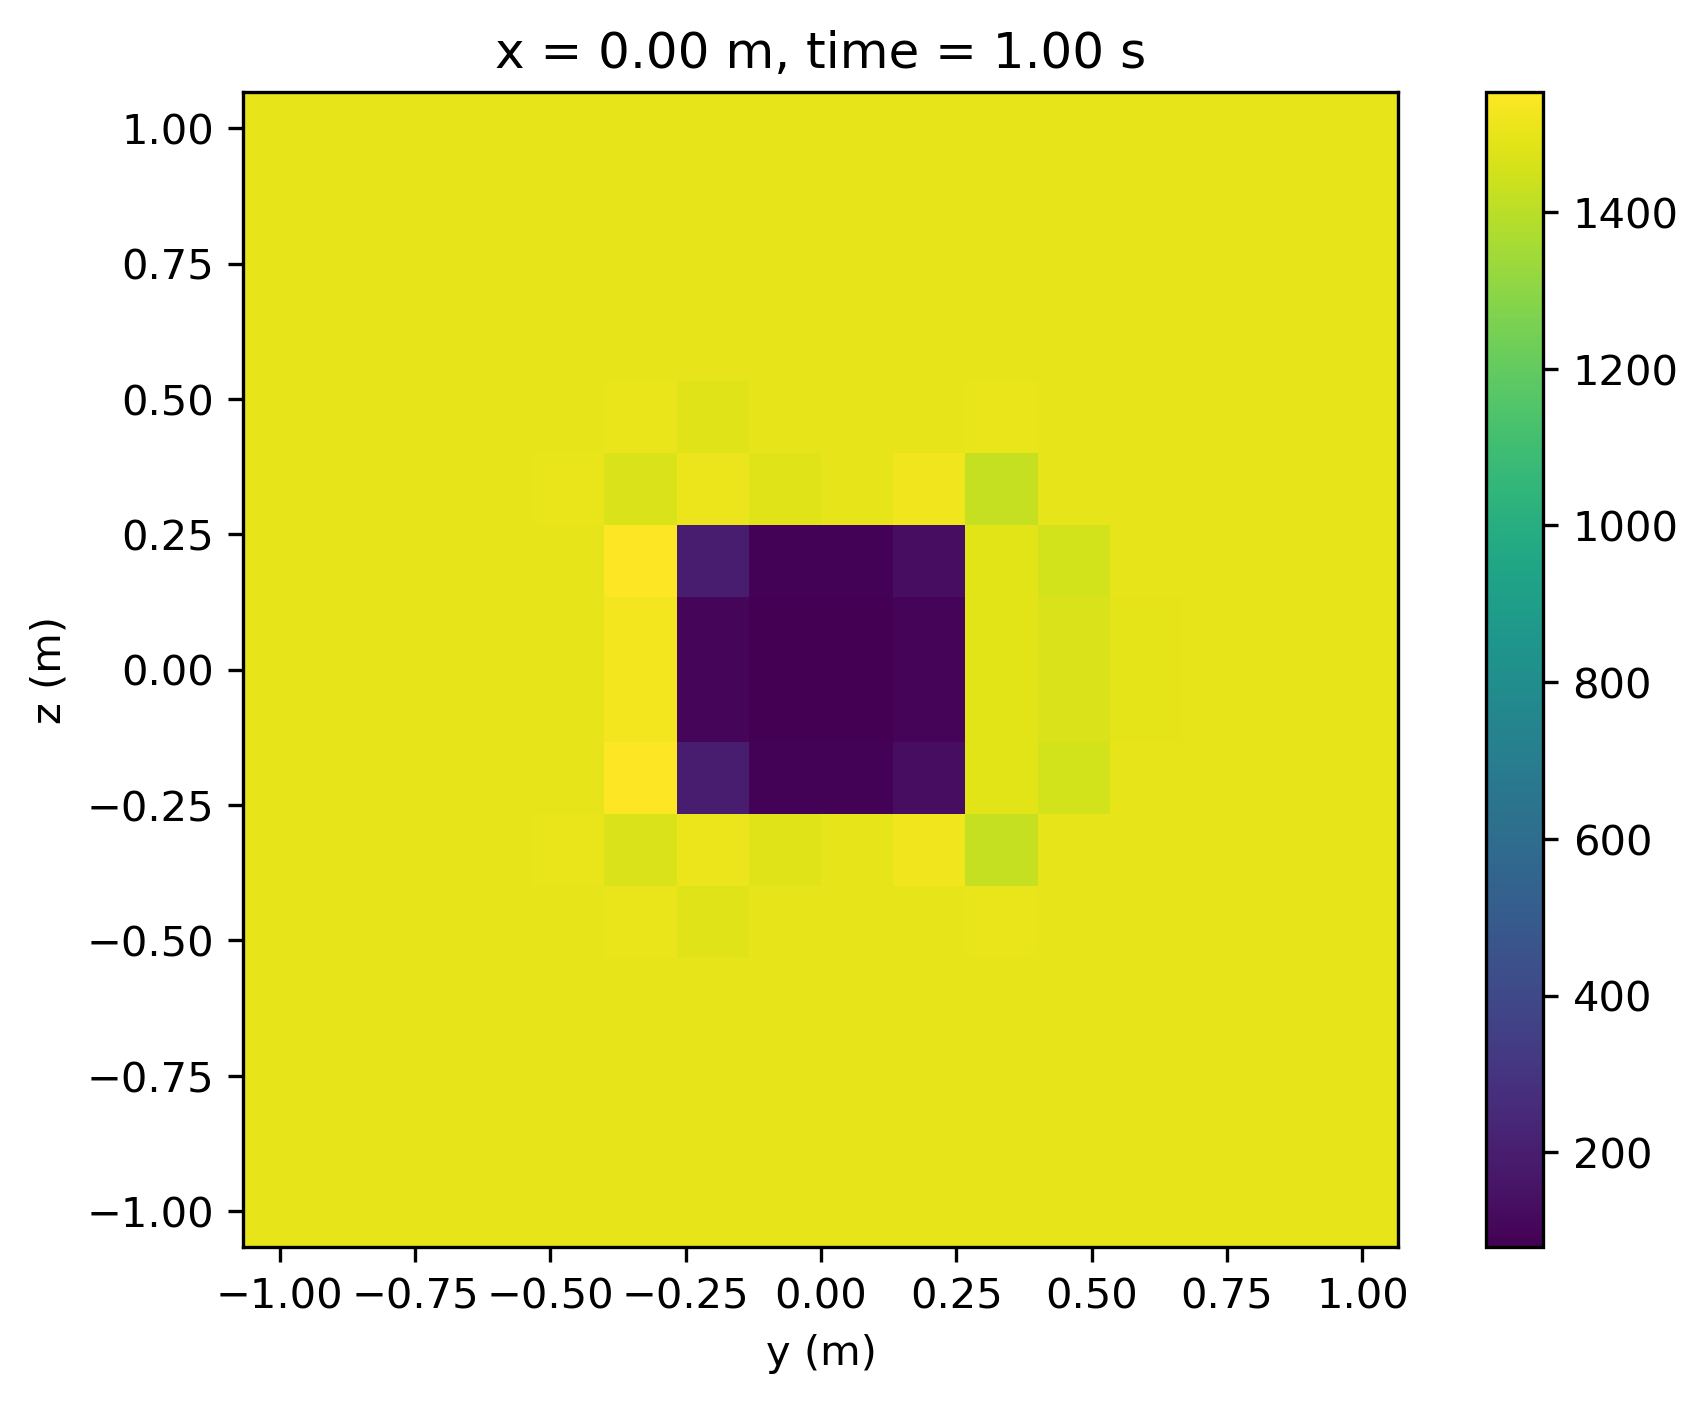

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(fx, fy), dpi=300)
im = ax.pcolormesh(Y,Z,slices[field])

length_unit ="m"
ax.set_xlabel(f"y ({length_unit})")
ax.set_ylabel(f"z ({length_unit})")
ax.set_title(f"""{normal} = {iloc:.2f} {length_unit}, """
 f"""time = {float(time.in_units("s")):.2f} s""")

ax.set_box_aspect(1) 
cbar = fig.colorbar(im, ax=ax)
cbar.mappable.set_clim(f_min, f_max)
